## Decision Tree Classification 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataSet

In [2]:
import pandas as pd
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


![Alt text](image.png)

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'plotcount of species'}, xlabel='species'>

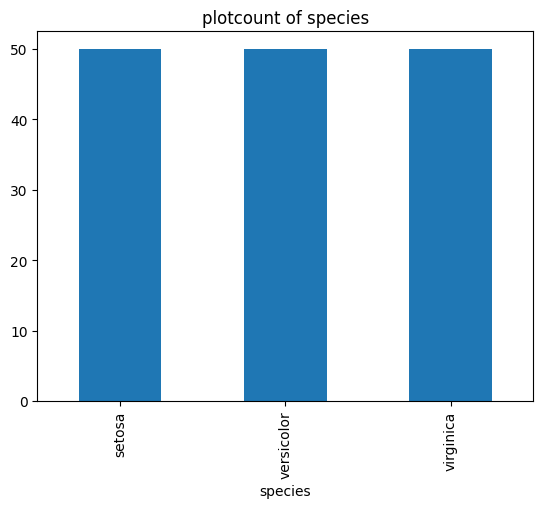

In [7]:
df['species'].value_counts().plot(kind='bar',title="plotcount of species" )

## Seperate X and Y

In [8]:
X= df.drop(columns=['species'])
Y=df[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply Label encoding on Y

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y['species']=le.fit_transform(Y['species'])

In [12]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [13]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

### Preprocessing X with Pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                         ('scaler',StandardScaler())])


In [17]:
X_pre=num_pipe.fit_transform(X)

In [18]:
X_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [19]:
cols=num_pipe.get_feature_names_out()

In [20]:
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [22]:
X_pre=pd.DataFrame(X_pre,columns=cols)

In [23]:
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.33,random_state=63)

### Creating a decision tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_depth=4,min_samples_split=11,min_samples_leaf=5,random_state=21,criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=11, random_state=21)

In [29]:
# Check the training accuracy
model.score(xtrain,ytrain)

0.97

In [30]:
# check the testing accuracy
model.score(xtest,ytest)

0.94

### Hyperparameter tuning of model

In [35]:
params={'max_depth':[2,3,4,5,6],
        'min_samples_split':[6,7,8,4,3,9,10,11,12,13],
        'min_samples_leaf':[4,5,6,7,8,9],
        'criterion':['gini','entropy']}


In [36]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
gscv=GridSearchCV(dtc,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [6, 7, 8, 4, 3, 9, 10, 11, 12,
                                               13]},
             scoring='f1_macro')

In [37]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [38]:
gscv.best_score_

0.9468864468864467

In [39]:
best_dtc=gscv.best_estimator_

In [40]:
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=6)

In [42]:
# Acuracy in training
best_dtc.score(xtrain,ytrain)

0.97

In [43]:
# Acuracy in testing
best_dtc.score(xtest,ytest)

0.94

### Ploting decision tree

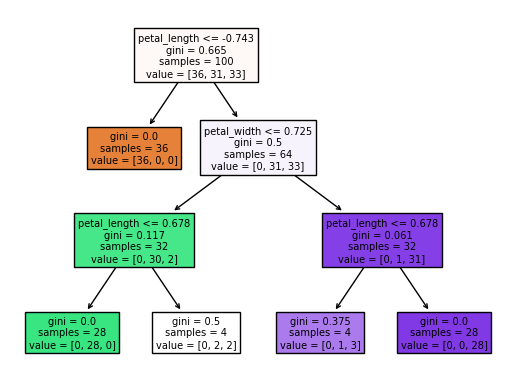

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(best_dtc,filled=True,feature_names=xtrain.columns)
plt.show()

In [49]:
ytrain.value_counts()

species
0          36
2          33
1          31
Name: count, dtype: int64

### Confusion Matrix

In [51]:
ypred_tr=best_dtc.predict(xtrain)
ypred_ts=best_dtc.predict(xtest)

In [52]:
ypred_tr

array([1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0,
       0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0])

In [53]:
ypred_ts

array([2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 1])

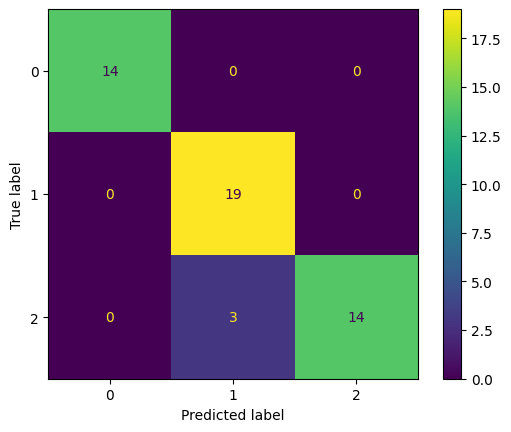

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

### Print classification report

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.93        19
           2       1.00      0.82      0.90        17

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### Getting orignal labels with le.inverse_transform

In [56]:
ypred_tr_lb=le.inverse_transform(ypred_tr)
ypred_ts_lb=le.inverse_transform(ypred_ts)

In [57]:
ypred_tr_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa',

In [58]:
ypred_ts_lb

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor'], dtype=object)

### Predicting new values

In [59]:
xnew=pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [60]:
xnew_pre=num_pipe.transform(xnew)

In [61]:
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [62]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)

In [63]:
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [64]:
preds=best_dtc.predict(xnew_pre)

In [65]:
preds

array([1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1])

In [67]:
preds_lb=le.inverse_transform(preds)
preds_lb

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [68]:
xnew['species']=preds_lb

In [69]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,versicolor
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


<Axes: title={'center': 'plotcount of species'}, xlabel='species'>

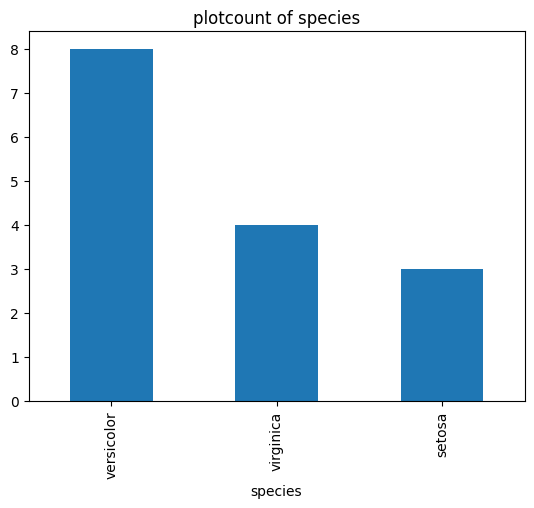

In [70]:
xnew['species'].value_counts().plot(kind='bar',title='plotcount of species')